<a href="https://colab.research.google.com/github/Gurki707/ProjectIED/blob/main/CHATGPT_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Opens a file-picker in Colab so you can choose your photo
uploaded = files.upload()

Saving IMG_6233.HEIC to IMG_6233.HEIC


In [2]:
# Converts iPhone HEIC images to JPG so Python can read them
!pip -q install pillow pillow-heif

from PIL import Image
import pillow_heif

input_path = list(uploaded.keys())[0]  # automatically get uploaded file name and converts to jpg
output_path = input_path.rsplit(".", 1)[0] + "_converted.jpg"

heif_file = pillow_heif.read_heif(input_path)
image = Image.frombytes(
    heif_file.mode, heif_file.size, heif_file.data, "raw"
)
image.save(output_path, format="JPEG")

print(f"✅ Converted {input_path} → {output_path}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.7 MB/s eta 0:00:00
✅ Converted IMG_6233.HEIC → IMG_6233_converted.jpg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using image: IMG_6233_converted.jpg


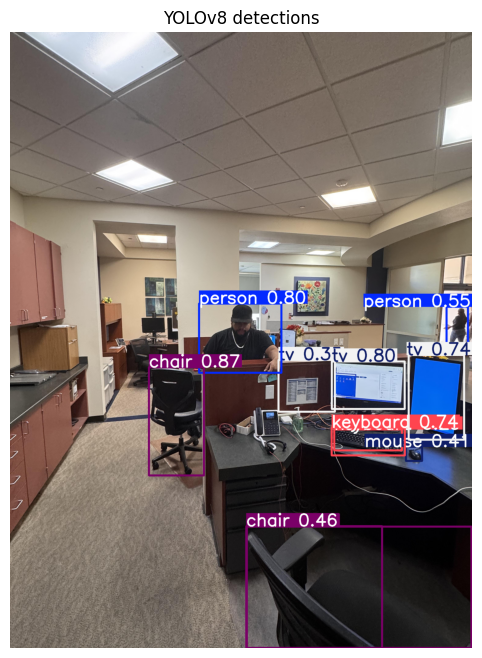

Detections: [{'label': 'chair', 'conf': 0.873, 'xyxy': [909.73779296875, 2194.3935546875, 1269.0611572265625, 2902.739013671875]}, {'label': 'person', 'conf': 0.805, 'xyxy': [1237.278564453125, 1777.588134765625, 1776.594970703125, 2230.2587890625]}, {'label': 'tv', 'conf': 0.799, 'xyxy': [2106.290771484375, 2156.959716796875, 2583.27587890625, 2467.600830078125]}, {'label': 'tv', 'conf': 0.742, 'xyxy': [2609.49462890625, 2114.7802734375, 2972.24609375, 2668.827880859375]}, {'label': 'keyboard', 'conf': 0.736, 'xyxy': [2105.093994140625, 2589.60107421875, 2584.274658203125, 2771.6201171875]}, {'label': 'person', 'conf': 0.548, 'xyxy': [2857.952880859375, 1798.464599609375, 2997.79296875, 2095.78662109375]}, {'label': 'chair', 'conf': 0.461, 'xyxy': [1546.95703125, 3234.7890625, 2435.827880859375, 4031.200927734375]}, {'label': 'chair', 'conf': 0.406, 'xyxy': [1550.2652587890625, 3237.8544921875, 3020.144287109375, 4031.102294921875]}, {'label': 'mouse', 'conf': 0.405, 'xyxy': [2591.477

In [3]:
# --- YOLOv8: draw boxes + labels on an image and display/save the result ---

# 1) Install & imports
!pip -q install ultralytics opencv-python
from ultralytics import YOLO
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# 2) Resolve an input image path
IMAGE_PATH = None
try:
    # If you ran the HEIC->JPG cell earlier, it defined `output_path`
    if 'output_path' in globals() and os.path.exists(output_path):
        IMAGE_PATH = output_path
except Exception:
    pass

if IMAGE_PATH is None:
    # Fall back to a file picker
    from google.colab import files
    uploaded = files.upload()
    IMAGE_PATH = next(iter(uploaded.keys()))

print(f"Using image: {IMAGE_PATH}")

# 3) Load a lightweight pretrained YOLOv8 model (swap to yolov8s.pt / yolov8m.pt for stronger)
model = YOLO("yolov8n.pt")

# 4) Run inference
results = model(IMAGE_PATH, verbose=False)[0]   # first (and only) image's result

# 5) Render annotated image (results.plot() returns a BGR numpy array)
annot_bgr = results.plot()
annot_rgb = cv2.cvtColor(annot_bgr, cv2.COLOR_BGR2RGB)

# 6) Show inline
plt.figure(figsize=(10, 8))
plt.imshow(annot_rgb)
plt.axis("off")
plt.title("YOLOv8 detections")
plt.show()

# 7) Print detections (label + confidence)
names = model.names
det_list = []
for b in results.boxes:
    cls = int(b.cls[0].item())
    conf = float(b.conf[0].item())
    x1, y1, x2, y2 = map(float, b.xyxy[0].tolist())
    det_list.append({"label": names[cls], "conf": round(conf, 3), "xyxy": [x1, y1, x2, y2]})
print("Detections:", det_list)

# 8) Save annotated image next to the input
base, ext = os.path.splitext(IMAGE_PATH)
out_path = f"{base}_yolo_annotated.jpg"
cv2.imwrite(out_path, annot_bgr)  # keep as BGR for cv2.imwrite
print(f"Saved annotated image → {out_path}")


In [4]:
!pip -q install "openai>=1.40.0"

from openai import OpenAI
import base64, json, os



In [5]:
from getpass import getpass
import os
from openai import OpenAI

# When you run this, Colab will prompt you to paste your key securely
os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key (starts with sk-): ")

client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])



Enter your OpenAI API key (starts with sk-): ··········


In [6]:
try:
    resp = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": "Say hello"}],
        max_tokens=10
    )
    print("✅ API key works! Model replied:", resp.choices[0].message.content)
except Exception as e:
    print("⚠️ Error:", e)


✅ API key works! Model replied: Hello! How can I assist you today?


In [7]:
def encode_image_to_b64(path):
    """Convert image to Base64 for GPT-Vision"""
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")


In [8]:
image_path = output_path  # the converted JPG

response = client.chat.completions.create(
    model="gpt-4o-mini",  # or "gpt-4.1" for full Vision
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text",
                 "text": (
                     "Describe what you see in this image and identify the environment type "
                     "(classroom, office, store, etc.).")},
                {"type": "image_url",
                 "image_url": {
                     "url": f"data:image/jpeg;base64,{encode_image_to_b64(image_path)}",
                     "detail": "low"  # 'low' is fast, 'high' for detailed reasoning
                 }},
            ],
        }
    ],
)

print(response.choices[0].message.content)


The image depicts an office environment. There are multiple desks with computers, chairs, and office cabinetry. It appears to be a workspace with an organized layout, featuring a few employees working at their stations. The lighting is bright, and the overall setting seems conducive to productivity.


In [9]:
prompt = (
    "You are a robot vision module. Analyze this image and return JSON with: "
    "room_type (string), confidence (0-1), rationale (string), key_objects (array)."
)

response_json = client.chat.completions.create(
    model="gpt-4o-mini",
    response_format={"type": "json_object"},
    messages=[
        {"role": "system", "content": prompt},
        {"role": "user", "content": [
            {"type": "image_url",
             "image_url": {"url": f"data:image/jpeg;base64,{encode_image_to_b64(image_path)}"}}
        ]},
    ],
)

print(json.loads(response_json.choices[0].message.content))


{'room_type': 'office', 'confidence': 0.95, 'rationale': 'The image depicts multiple workstations with desks, computers, and office chairs, typical of an office environment.', 'key_objects': ['desks', 'computers', 'office chairs', 'telephone', 'cabinet']}
